In [34]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

### Data Preparation

In [35]:
#Read `crypto_data.csv` into Pandas.
file = '../Resources/crypto_data.csv'

In [36]:
df = pd.read_csv(file)
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [37]:
df.sample(10)

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
81,EAC,EarthCoin,Scrypt,True,PoW,1.253902e+10,13500000000
1118,RBTC,Smart Bitcoin,SHA-256,True,PoW,0.000000e+00,20999764
1171,TWLV,Twelve Coin,T-Inside,True,PoW/PoS,NaN,0
858,LTHN,Lethean,CryptoNight-V7,True,PoW,4.412502e+08,999481516
918,SSS,ShareChain,Scrypt,True,PoW,1.000000e+10,10000000000
587,HZT,HazMatCoin,Scrypt,True,PoW/PoS,NaN,100000000
1154,AMBER,AmberCoin,X11,True,PoW/PoS,NaN,1000000000
766,XLC,LeviarCoin,CryptoNight,True,PoW,1.416180e+07,54000000
1242,GAP,Gapcoin,Scrypt,True,PoW/PoS,1.493105e+07,250000000
496,OLYMP,OlympCoin,X11,True,PoW/PoS,NaN,50000000


In [38]:
df.shape

(1252, 7)

In [39]:
#Discard all cryptocurrencies that are not being traded.
df2 = df[df.IsTrading]
df.shape

(1252, 7)

In [40]:
# Remove all rows that have at least one null value
df2.dropna()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,True,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,True,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [41]:
#Filter for cryptocurrencies that have been mined.
df3 = df2[df2['TotalCoinsMined'] > 0]
df3.shape

(532, 7)

In [42]:
#Since the coin names do not contribute to the analysis of the data, delete the `CoinName` from the original dataframe
df4 = df3.drop(['CoinName','Unnamed: 0'], axis = 1)
df4.shape

(532, 5)

In [43]:
df4

,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,True,PoW/PoS,4.199995e+01,42
2,Scrypt,True,PoW/PoS,1.055185e+09,532000000
5,X13,True,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,True,PoW,1.792718e+07,21000000
8,Ethash,True,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,SHA-256,True,DPoS,2.000000e+09,2000000000
1242,Scrypt,True,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,Equihash,True,PoW,7.296538e+06,21000000


In [44]:
# One-hot encoding the 'workclass' column creates 9 new columns, one for each category
dummies1 = pd.get_dummies(df4['Algorithm']) # adds 71 column
dummies2 = pd.get_dummies(df4['ProofType']) # adds 25 column

In [45]:
df4

,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,True,PoW/PoS,4.199995e+01,42
2,Scrypt,True,PoW/PoS,1.055185e+09,532000000
5,X13,True,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,True,PoW,1.792718e+07,21000000
8,Ethash,True,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,SHA-256,True,DPoS,2.000000e+09,2000000000
1242,Scrypt,True,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,Equihash,True,PoW,7.296538e+06,21000000


In [46]:
merged1 = pd.concat([df4, dummies1], axis='columns')
merged1

,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply,1GB AES Pattern Search,536,Argon2d,BLAKE256,Blake,...,Tribus,VBFT,VeChainThor Authority,X11,X11GOST,X13,X14,X15,X16R,XEVAN
0,Scrypt,True,PoW/PoS,4.199995e+01,42,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Scrypt,True,PoW/PoS,1.055185e+09,532000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,X13,True,PoW/PoS,2.927942e+10,314159265359,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,SHA-256,True,PoW,1.792718e+07,21000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Ethash,True,PoW,1.076842e+08,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,SHA-256,True,DPoS,2.000000e+09,2000000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,Scrypt,True,PoW/PoS,1.493105e+07,250000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1245,CryptoNight,True,PoW,9.802226e+08,1400222610,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,Equihash,True,PoW,7.296538e+06,21000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
merged2 = pd.concat([merged1, dummies2], axis='columns')
merged2

,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply,1GB AES Pattern Search,536,Argon2d,BLAKE256,Blake,...,PoW/PoS,PoW/PoS,PoW/PoW,PoW/nPoS,Pos,Proof of Authority,Proof of Trust,TPoS,Zero-Knowledge Proof,dPoW/PoW
0,Scrypt,True,PoW/PoS,4.199995e+01,42,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,Scrypt,True,PoW/PoS,1.055185e+09,532000000,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,X13,True,PoW/PoS,2.927942e+10,314159265359,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,SHA-256,True,PoW,1.792718e+07,21000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Ethash,True,PoW,1.076842e+08,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,SHA-256,True,DPoS,2.000000e+09,2000000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,Scrypt,True,PoW/PoS,1.493105e+07,250000000,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,CryptoNight,True,PoW,9.802226e+08,1400222610,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,Equihash,True,PoW,7.296538e+06,21000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
newdf = merged2.drop(['Algorithm','ProofType','IsTrading'], axis = 1)
# df4 = df3.drop(['CoinName'], axis = 1)

In [49]:
newdf

,TotalCoinsMined,TotalCoinSupply,1GB AES Pattern Search,536,Argon2d,BLAKE256,Blake,Blake2S,Blake2b,C11,...,PoW/PoS,PoW/PoS,PoW/PoW,PoW/nPoS,Pos,Proof of Authority,Proof of Trust,TPoS,Zero-Knowledge Proof,dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# Standardize your dataset so that columns that contain larger values do not unduly influence the outcome.
scaler = StandardScaler()
features_standardized = scaler.fit_transform(newdf)

### Dimensionality Reduction

Perform dimensionality reduction with PCA. Using `PCA(n_components=0.90)` creates a model that will preserve approximately 90% 

In [95]:
# Initialize PCA model
pca = PCA(n_components=.90)

# Get 90% of the principal components for the data.
newdf_pca = pca.fit_transform(features_standardized)

In [96]:
# PCA reduced the dataset from 98 columns to 74 columns 
newdf_pca.shape

(532, 74)

Next, further reduce the dataset dimensions with t-SNE and visually inspect the results.

In [97]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=35) # 

In [98]:
# Reduce dimensions
tsne_features = tsne.fit_transform(newdf_pca) # get our features

In [99]:
# The dataset has 2 columns
tsne_features.shape # get features shape. it is a two feature shape.

(532, 2)

In [100]:
#tSNE further reduced the dataset from 74 features to 2

In [101]:
tsne_features

array([[-12.933828 ,  -7.1725936],
       [-15.373422 , -13.702256 ],
       [-15.077353 , -20.66528  ],
       ...,
       [ 12.185503 ,  21.16292  ],
       [ 15.2031   ,   9.223511 ],
       [  6.8385735,  -7.343474 ]], dtype=float32)

In [102]:
# newdf_pca['x'] = transformed_features[:,0]
# newdf_pca['y'] = transformed_features[:,1]
# df2['class'] = df['target']

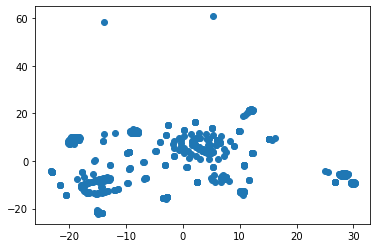

In [103]:
# Plot the results
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

In [104]:
# Transform PCA data to a DataFrame
df_tsne_features = pd.DataFrame(
    data=tsne_features, columns=["principal component 1", "principal component 2"]
)
df_tsne_features.head()
# what is represented below is factor loadings

,principal component 1,principal component 2
0,-12.933828,-7.172594
1,-15.373422,-13.702256
2,-15.077353,-20.665279
3,28.832899,-6.058881
4,9.859513,12.747428


C:\Users\jlist\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


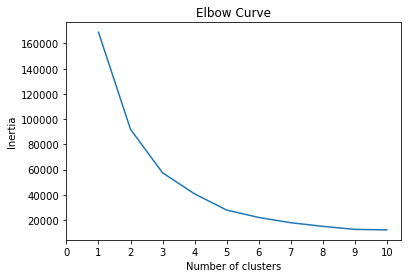

In [105]:
# the elbow appears at 3 clusters which is the value of k

from sklearn.cluster import KMeans
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values using a for loop
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_tsne_features)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [106]:
# Predicting clusters with k=3

# Initialize the k-means model
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(df_tsne_features)

# Predict clusters
predictions = model.predict(df_tsne_features)

# Add the predicted class column to the dataframe
df_tsne_features["class"] = model.labels_
df_tsne_features.head()

,principal component 1,principal component 2,class
0,-12.933828,-7.172594,0
1,-15.373422,-13.702256,0
2,-15.077353,-20.665279,0
3,28.832899,-6.058881,1
4,9.859513,12.747428,2


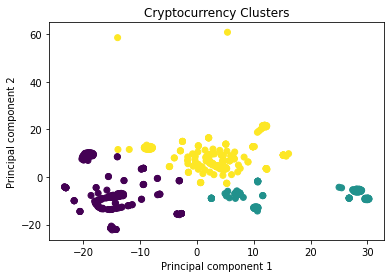

In [107]:
# Visualize the clusters on the reduced dataset
plt.scatter(x=df_tsne_features['principal component 1'], y=df_tsne_features['principal component 2'], c=df_tsne_features['class'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Cryptocurrency Clusters')
plt.show()

### Recommendation: There are 3 clusters that are formed on the reduced dimensionality dataset. This means that cryptocurrencies can be grouped into 3 types, so it appears that it may be worth your time to do more research into creating a classification system that would help offer a new cryptocurrency investment portfolio for your customers.